In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
from scipy.optimize import minimize
from pandas_datareader import DataReader
from datetime import datetime
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress

In [2]:
#finding the Slope of linear regression line
# def Slope(a,b):
#     n=len(a)
#     two_sum=np.sum(a*b)
#     sumX=np.sum(a)
#     sumY=np.sum(b)
#     sumX_2=np.sum(a**2)
#     slope=(n*two_sum-sumX*sumY)/(n*sumX_2-(sumX)**2)
#     return slope

In [11]:
def Slope(a,b):
    slope=(np.mean(a*b) - np.mean(a)* np.mean(b)) / (np.mean(a**2) - (np.mean(a)**2))
    return slope

Slope(X_train, Y_train)

0.01730590276795542

In [2]:
def Intercept(a,b):
    intercept=np.mean(b)-Slope(a,b)*np.mean(a)
    return intercept

In [3]:
def Predictions(slope,x_input,intercept):
    predict=slope*x_input + intercept
    return predict

In [4]:
def R_squared(predicted_values,test_values):
    f=predicted_values
    y=test_values
    print(f,'\n\n',y)
    #sum of squares
    ss_total=np.sum((y-np.mean(y))**2)
    #regression sum
    #ss_reg=np.sum((f-np.mean(y))**2)
    #Residuals sum of squares
    ss_res=np.sum((y-f)**2)
    #R-squared formula
    R_2=1-(ss_res/ss_total)
    return R_2


In [5]:
#Finding Correlation Coefficient for the given X & Y values
def correlation_coeff(predicted_values,test_values):
    a=predicted_values
    b=test_values
    n=len(a)
    two_sum=np.sum(a*b)
    sumX=np.sum(a)
    sumY=np.sum(b)
    sumX_2=np.sum(a**2)
    sumY_2=np.sum(b**2)
    score=(n*two_sum-sumX*sumY)/np.sqrt((n*sumX_2-(sumX)**2)*(n*sumY_2-(sumY)**2))
    return score

#Finding Covariance for the given X & Y values
def Covariance(X,Y):
    a=X
    b=Y
    n=len(a)
    two_sum=np.sum(a*b)
    cov=two_sum/n-np.mean(a)*np.mean(b)
    return cov

In [89]:
# Ten year data for P&G:
PG = DataReader('PG',  'yahoo', datetime(2019,1,1), datetime(2019,12,31));

# # Avergae of opening and closing:
PG["Average"] = (PG["Open"] + PG["Close"])/2
PG["idCol"] = range(1,PG.shape[0]+1)

# Required Dataset: 
PG.head()

,High,Low,Open,Close,Volume,Adj Close,Average,idCol
Date,,,,,,,,
2019-01-02,91.389999,89.930000,91.029999,91.279999,9843900.0,88.258690,91.154999,1
2019-01-03,92.500000,90.379997,90.940002,90.639999,9820200.0,87.639870,90.790001,2
2019-01-04,92.489998,90.370003,90.839996,92.489998,10565700.0,89.428635,91.664997,3
2019-01-07,92.500000,91.400002,91.910004,92.120003,9012500.0,89.070892,92.015003,4
2019-01-08,93.089996,91.820000,92.699997,92.459999,9551300.0,89.399635,92.579998,5


In [90]:
# Split-out validation dataset
#knowing the dimenstions of data and making them READY for PREDICTIONS.
# array = PG.values
X = np.array(PG["idCol"])
Y = np.array(PG["Average"])

In [91]:
#Covariation in data
print(Covariance(X,Y))

728.7716513361247


In [92]:
#Dividing data into training and testing classes
test_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size= test_size, random_state=seed)


In [93]:
#finding intercepts of rgression line
intercept=Intercept(X_train,Y_train)
slope=Slope(X_train,Y_train)
print(intercept,slope)
predictions=Predictions(slope=slope,x_input=X_validation,intercept=intercept)
predictions_train = Predictions(slope=slope,x_input=X_train,intercept=intercept)
print(R_squared(predicted_values=predictions,test_values=Y_validation))
print(correlation_coeff(test_values=Y_validation,predicted_values=predictions))

94.1239944713633 0.13608333311899237
[119.02724443 123.10974443 107.05191112 105.69107779  94.6683278
 110.72616111 107.46016112 126.64791109 113.17566111 110.86224444
 114.67257777 115.2169111  113.31174444 105.96324445 105.14674445
 101.33641113  97.25391113 125.96749442 108.00449445 125.69532775
 116.8499111  126.23966109 112.35916111 104.33024446 122.42932776
 101.06424446 106.23541112  95.75699447 118.75507777  94.53224447
  97.5260778  102.01682779 109.77357778 107.59624445 103.24157779
 112.49524444 105.41891112  95.21266114 102.42507779 115.6251611
 127.46441109 112.22307778  95.34874447 104.87457779  97.9343278
 124.33449442 102.69724446 125.01491109 103.10549446 117.93857777
 119.57157776 109.09316111 100.51991113 110.59007778 128.14482775
 113.99216111 104.73849445 103.78591112  98.47866113 121.20457776
 105.28282779 121.74891109  96.02916114 111.81482778  95.4848278
  96.7095778  106.50757779 111.27049444 126.37574442 122.56541109
  96.16524447  99.70341113 100.38382779 117

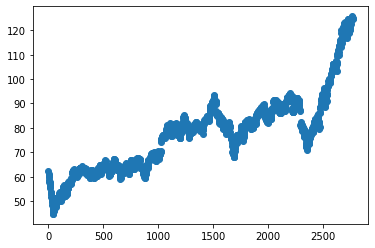

In [13]:
plt.scatter(X_train, Y_train)

In [94]:
df_lr_validate = pd.DataFrame(predictions, X_validation, columns = ["Y_pred"])
df_lr_train = pd.DataFrame(predictions_train, X_train, columns = ["Y_train"])

In [95]:
print(df_lr_validate.head())
print(df_lr_train.head())

         Y_pred
183  119.027244
213  123.109744
95   107.051911
85   105.691078
4     94.668328
        Y_train
116  109.909661
161  116.033411
29    98.070411
64   102.833328
185  119.299411


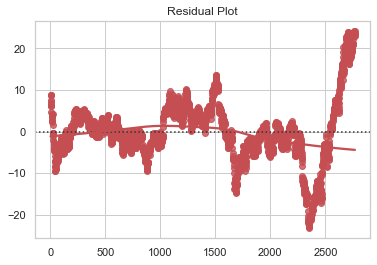

In [17]:
sns.set(style="whitegrid")
# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
#Plot the residuals after fitting a linear model
sns.residplot(X, Y, lowess=True, color="r")
plt.title('Residual Plot')
plt.show()


In [21]:
mean_error = np.mean(Y_dash - PG['Average'])
rms = sqrt(mean_squared_error(PG['Average'], Y_dash.fillna(0)))
print(rms)

NameError: name 'Y_dash' is not defined

In [96]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)
 
# Test RMSE
actual = predictions
predicted = Y_validation
rmse = rmse_metric(actual, predicted)
print(rmse)

2.3996715190154623


Text(0, 0.5, 'Value')

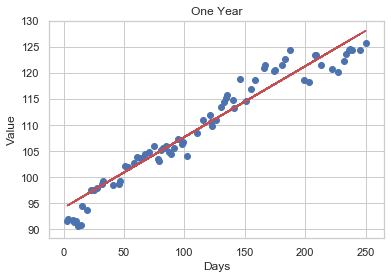

In [55]:
#Equation of Linear Regression
y=slope*X_validation+intercept

#plotting the linear regression function
plt.plot(X_validation, y, '-r')
plt.scatter(X_validation,Y_validation)
plt.title('One Year')
plt.xlabel('Days')
plt.ylabel('Value')


Text(0, 0.5, 'Value')

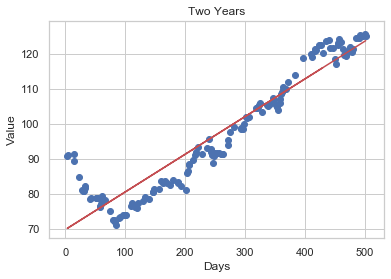

In [63]:
#Equation of Linear Regression
y=slope*X_validation+intercept

#plotting the linear regression function
plt.plot(X_validation, y, '-r')
plt.scatter(X_validation,Y_validation)
plt.title('Two Years')
plt.xlabel('Days')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

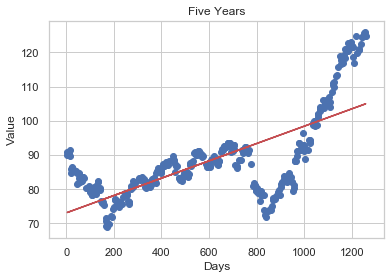

In [47]:
#Equation of Linear Regression
y=slope*X_validation+intercept

#plotting the linear regression function
plt.plot(X_validation, y, '-r')
plt.scatter(X_validation,Y_validation)
plt.title('Five Years')
plt.xlabel('Days')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

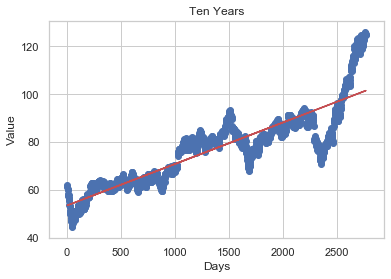

In [72]:
#Equation of Linear Regression
y=slope*X_train+intercept

#plotting the linear regression function
plt.plot(X_train, y, '-r')
plt.scatter(X_train,Y_train)
plt.title('Ten Years')
plt.xlabel('Days')
plt.ylabel('Value')

In [98]:
results = pd.DataFrame(np.array([[0.9470515195854227,2.3996715190154623,0.9740713703404823,728.7716513361247],
                                 [0.8960687437672312,5.518406268657569,0.9469431230424618,2277.9836936177126],
                                 [0.4987829801361877,9.097153466973404,0.7085175583463196,3316.7523330906843],
                                 [0.7813351133123062,7.529424587499748,0.8840681911280253,11090.926879191684]]),
                       columns=['r2','rmse','correlation coef','covariance'], 
                      index=[1,2,5,10])
results.head()

,r2,rmse,correlation coef,covariance
1,0.947052,2.399672,0.974071,728.771651
2,0.896069,5.518406,0.946943,2277.983694
5,0.498783,9.097153,0.708518,3316.752333
10,0.781335,7.529425,0.884068,11090.926879
